PART 1: SIMPLE OPTIMIZATION - UNDERSTANDING THE BASICS

Example Evaluation:
θ = [0.5 1.5]
L(θ) = 0.5000
Optimal θ = [0, 1], L(θ*) = 0.0000

[Visualizing 2D objective function landscape...]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/01_loss_landscape.png'

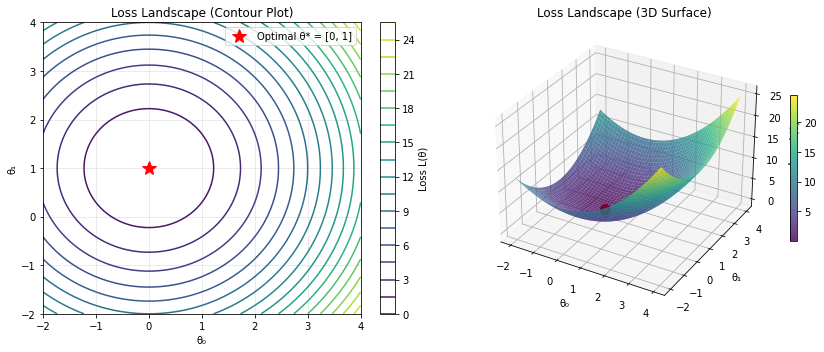

In [1]:
"""
COMPREHENSIVE TUTORIAL: OPTIMIZATION ALGORITHMS IN MACHINE LEARNING
====================================================================

This tutorial covers optimization techniques from basic to advanced concepts,
with a practical application to the face direction prediction problem.

Author: Tutorial for MSc Data Science Student
Topic: Optimization Algorithms in ML - Theory, Math, and Implementation
"""

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*80)
print("PART 1: SIMPLE OPTIMIZATION - UNDERSTANDING THE BASICS")
print("="*80)

"""
THEORY: What is Optimization?
------------------------------
Optimization is the process of finding the best solution from all feasible solutions.
In machine learning, we typically want to MINIMIZE a loss function L(θ) where:
- θ (theta) represents our parameters (what we're optimizing)
- L(θ) represents how "bad" our current parameters are (lower is better)

MATHEMATICAL FORMULATION:
θ* = argmin L(θ)
     θ

Where θ* is the optimal parameter setting that minimizes L(θ).
"""

def simple_objective_function(theta: np.ndarray) -> float:
    """
    Simple quadratic objective function to minimize.
    
    Mathematical Form: L(θ) = Σ(θ_i - i)²
    
    This represents a parabolic bowl in parameter space.
    The minimum is at θ = [0, 1] for a 2D problem.
    
    Args:
        theta: Parameter vector of shape (I,)
    
    Returns:
        Loss value (scalar)
    
    INTUITION:
    - Each dimension i wants θ_i to equal i
    - (θ_i - i)² creates a quadratic penalty for deviation
    - The sum aggregates penalties across all dimensions
    """
    I = len(theta)
    loss = 0.0
    for i in range(I):
        loss += (theta[i] - i) ** 2
    return loss

# Example: Evaluating the objective function
theta_example = np.array([0.5, 1.5])
loss_example = simple_objective_function(theta_example)
print(f"\nExample Evaluation:")
print(f"θ = {theta_example}")
print(f"L(θ) = {loss_example:.4f}")
print(f"Optimal θ = [0, 1], L(θ*) = 0.0000")

# Visualize the objective function landscape
print("\n[Visualizing 2D objective function landscape...]")
theta0_range = np.linspace(-2, 4, 100)
theta1_range = np.linspace(-2, 4, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(Theta0)

for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([Theta0[j, i], Theta1[j, i]])
        Z[j, i] = simple_objective_function(theta)

plt.figure(figsize=(12, 5))

# Contour plot
plt.subplot(1, 2, 1)
contour = plt.contour(Theta0, Theta1, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Loss L(θ)')
plt.plot(0, 1, 'r*', markersize=15, label='Optimal θ* = [0, 1]')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Loss Landscape (Contour Plot)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3D surface plot
ax = plt.subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(Theta0, Theta1, Z, cmap='viridis', alpha=0.8)
ax.scatter([0], [1], [0], color='red', s=100, label='Optimal point')
ax.set_xlabel('θ₀')
ax.set_ylabel('θ₁')
ax.set_zlabel('Loss L(θ)')
ax.set_title('Loss Landscape (3D Surface)')
plt.colorbar(surf, ax=ax, shrink=0.5)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/01_loss_landscape.png', dpi=150, bbox_inches='tight')
print("✓ Saved: 01_loss_landscape.png")
plt.close()

print("\n" + "="*80)
print("PART 2: RANDOM SEARCH - THE NAIVE APPROACH")
print("="*80)

"""
THEORY: Random Search
---------------------
Random search is the simplest optimization method:
1. Generate random parameter configurations
2. Evaluate the loss for each configuration
3. Keep the best one found

ALGORITHM:
----------
Initialize: θ_best = random, L_best = L(θ_best)
For iteration = 1 to N:
    θ_candidate = random sample from parameter space
    L_candidate = L(θ_candidate)
    If L_candidate < L_best:
        θ_best = θ_candidate
        L_best = L_candidate
Return θ_best

PROS:
- Simple to implement
- No assumptions about function shape
- Can escape local minima

CONS:
- Very inefficient (doesn't learn from previous samples)
- Requires many evaluations
- No guarantee of convergence
"""

def random_search(objective_func: Callable, 
                  n_iterations: int = 1000,
                  bounds: Tuple[float, float] = (-5, 5),
                  n_dims: int = 2) -> Tuple[np.ndarray, List[float], List[np.ndarray]]:
    """
    Perform random search optimization.
    
    Args:
        objective_func: Function to minimize
        n_iterations: Number of random samples
        bounds: (min, max) for parameter space
        n_dims: Dimensionality of parameter space
    
    Returns:
        best_theta: Best parameters found
        loss_history: Loss at each iteration
        theta_history: Parameters at each iteration
    """
    # Initialize with random guess
    best_theta = np.random.uniform(bounds[0], bounds[1], n_dims)
    best_loss = objective_func(best_theta)
    
    loss_history = [best_loss]
    theta_history = [best_theta.copy()]
    
    # Random search loop
    for i in range(n_iterations - 1):
        # Generate random candidate
        candidate_theta = np.random.uniform(bounds[0], bounds[1], n_dims)
        candidate_loss = objective_func(candidate_theta)
        
        # Keep if better
        if candidate_loss < best_loss:
            best_theta = candidate_theta
            best_loss = candidate_loss
        
        loss_history.append(best_loss)
        theta_history.append(best_theta.copy())
    
    return best_theta, loss_history, theta_history

# Run random search
print("\nRunning Random Search (1000 iterations)...")
best_theta_rs, loss_history_rs, theta_history_rs = random_search(
    simple_objective_function, n_iterations=1000
)

print(f"\nResults:")
print(f"Best θ found: {best_theta_rs}")
print(f"Best loss: {loss_history_rs[-1]:.6f}")
print(f"Optimal θ: [0, 1]")
print(f"Optimal loss: 0.000000")
print(f"Distance from optimal: {np.linalg.norm(best_theta_rs - np.array([0, 1])):.6f}")

print("\n" + "="*80)
print("PART 3: HILL CLIMBING (HILL DESCENT)")
print("="*80)

"""
THEORY: Hill Climbing / Hill Descent
------------------------------------
Hill climbing (or descent for minimization) improves on random search by:
1. Starting from a point
2. Sampling neighbors around current point
3. Moving to best neighbor if it's better
4. Repeating until no improvement

ALGORITHM:
----------
Initialize: θ_current = random
For iteration = 1 to N:
    Generate neighbors: {θ_1, ..., θ_K} around θ_current
    Find best neighbor: θ_best_neighbor with lowest L(θ)
    If L(θ_best_neighbor) < L(θ_current):
        θ_current = θ_best_neighbor
    Else:
        Break (local minimum reached)
Return θ_current

PROS:
- More efficient than random search
- Uses local information
- Fast when near optimum

CONS:
- Can get stuck in local minima
- Requires tuning step size
- No gradient information used
"""

def hill_climbing(objective_func: Callable,
                  n_iterations: int = 1000,
                  step_size: float = 0.1,
                  n_neighbors: int = 20,
                  n_dims: int = 2) -> Tuple[np.ndarray, List[float], List[np.ndarray]]:
    """
    Perform hill climbing (descent) optimization.
    
    Args:
        objective_func: Function to minimize
        n_iterations: Maximum iterations
        step_size: Size of neighborhood to explore
        n_neighbors: Number of neighbors to sample per iteration
        n_dims: Dimensionality of parameter space
    
    Returns:
        best_theta: Best parameters found
        loss_history: Loss at each iteration
        theta_history: Parameters at each iteration
    """
    # Initialize
    current_theta = np.random.randn(n_dims)
    current_loss = objective_func(current_theta)
    
    loss_history = [current_loss]
    theta_history = [current_theta.copy()]
    
    for i in range(n_iterations - 1):
        # Generate neighbors by adding random noise
        neighbors = current_theta + np.random.randn(n_neighbors, n_dims) * step_size
        
        # Evaluate all neighbors
        neighbor_losses = [objective_func(neighbor) for neighbor in neighbors]
        
        # Find best neighbor
        best_neighbor_idx = np.argmin(neighbor_losses)
        best_neighbor_loss = neighbor_losses[best_neighbor_idx]
        best_neighbor = neighbors[best_neighbor_idx]
        
        # Move if improvement found
        if best_neighbor_loss < current_loss:
            current_theta = best_neighbor
            current_loss = best_neighbor_loss
        else:
            # Reduce step size (simulated annealing-like behavior)
            step_size *= 0.95
        
        loss_history.append(current_loss)
        theta_history.append(current_theta.copy())
    
    return current_theta, loss_history, theta_history

# Run hill climbing
print("\nRunning Hill Climbing (1000 iterations)...")
best_theta_hc, loss_history_hc, theta_history_hc = hill_climbing(
    simple_objective_function, n_iterations=1000, step_size=0.5
)

print(f"\nResults:")
print(f"Best θ found: {best_theta_hc}")
print(f"Best loss: {loss_history_hc[-1]:.6f}")
print(f"Distance from optimal: {np.linalg.norm(best_theta_hc - np.array([0, 1])):.6f}")

# Compare methods
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(loss_history_rs, label='Random Search', alpha=0.7)
plt.semilogy(loss_history_hc, label='Hill Climbing', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Loss (log scale)')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Plot paths on contour
plt.contour(Theta0, Theta1, Z, levels=20, cmap='gray', alpha=0.3)
theta_history_rs_array = np.array(theta_history_rs)
theta_history_hc_array = np.array(theta_history_hc)
plt.plot(theta_history_rs_array[::10, 0], theta_history_rs_array[::10, 1], 
         'o-', alpha=0.5, label='Random Search', markersize=3)
plt.plot(theta_history_hc_array[::10, 0], theta_history_hc_array[::10, 1], 
         's-', alpha=0.5, label='Hill Climbing', markersize=3)
plt.plot(0, 1, 'r*', markersize=15, label='Optimal')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Optimization Paths')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/02_random_vs_hillclimbing.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved: 02_random_vs_hillclimbing.png")
plt.close()

print("\n" + "="*80)
print("PART 4: GRADIENT DESCENT - USING CALCULUS FOR OPTIMIZATION")
print("="*80)

"""
THEORY: Differentiability and Gradient Descent
----------------------------------------------
The breakthrough insight: If our function is differentiable, we can use calculus
to find the direction of steepest descent!

MATHEMATICAL FOUNDATION:
-----------------------
The gradient ∇L(θ) is a vector of partial derivatives:

∇L(θ) = [∂L/∂θ₀, ∂L/∂θ₁, ..., ∂L/∂θₙ]ᵀ

Properties of the gradient:
1. Points in direction of steepest ASCENT
2. Magnitude indicates steepness
3. Zero gradient → local optimum (or saddle point)

GRADIENT DESCENT ALGORITHM:
---------------------------
Initialize: θ = random
For iteration = 1 to N:
    g = ∇L(θ)                    # Compute gradient
    θ = θ - α·g                  # Update parameters
    
Where α is the learning rate (step size)

UPDATE RULE INTUITION:
---------------------
- ∇L(θ) points uphill (where loss increases)
- We subtract it to go downhill (where loss decreases)
- α controls how big a step we take
- Too large α → oscillation/divergence
- Too small α → slow convergence

FOR OUR SIMPLE OBJECTIVE L(θ) = Σ(θᵢ - i)²:
-------------------------------------------
∂L/∂θᵢ = 2(θᵢ - i)

So: ∇L(θ) = 2(θ - [0, 1, 2, ..., n])
"""

def gradient_simple_objective(theta: np.ndarray) -> np.ndarray:
    """
    Compute gradient of L(θ) = Σ(θᵢ - i)²
    
    Derivation:
    L(θ) = Σᵢ (θᵢ - i)²
    ∂L/∂θⱼ = ∂/∂θⱼ Σᵢ (θᵢ - i)²
           = 2(θⱼ - j)    [only j-th term contributes]
    
    Therefore: ∇L(θ) = 2(θ - [0, 1, 2, ..., n-1])
    """
    I = len(theta)
    indices = np.arange(I)
    gradient = 2 * (theta - indices)
    return gradient

def gradient_descent(objective_func: Callable,
                     gradient_func: Callable,
                     n_iterations: int = 1000,
                     learning_rate: float = 0.1,
                     n_dims: int = 2) -> Tuple[np.ndarray, List[float], List[np.ndarray]]:
    """
    Perform gradient descent optimization.
    
    Args:
        objective_func: Function to minimize
        gradient_func: Function that computes gradient
        n_iterations: Number of iterations
        learning_rate: Step size (α)
        n_dims: Dimensionality
    
    Returns:
        theta: Final parameters
        loss_history: Loss at each iteration
        theta_history: Parameters at each iteration
    """
    # Initialize randomly
    theta = np.random.randn(n_dims)
    
    loss_history = []
    theta_history = []
    
    for i in range(n_iterations):
        # Store current state
        loss = objective_func(theta)
        loss_history.append(loss)
        theta_history.append(theta.copy())
        
        # Compute gradient
        gradient = gradient_func(theta)
        
        # Update parameters (gradient descent step)
        theta = theta - learning_rate * gradient
    
    return theta, loss_history, theta_history

# Run gradient descent with different learning rates
print("\nTesting Gradient Descent with different learning rates...")

learning_rates = [0.01, 0.1, 0.5]
results_gd = {}

for lr in learning_rates:
    theta_final, loss_hist, theta_hist = gradient_descent(
        simple_objective_function,
        gradient_simple_objective,
        n_iterations=100,
        learning_rate=lr
    )
    results_gd[lr] = (theta_final, loss_hist, theta_hist)
    print(f"\nLearning Rate α = {lr}:")
    print(f"  Final θ: {theta_final}")
    print(f"  Final loss: {loss_hist[-1]:.8f}")
    print(f"  Converged: {'Yes' if loss_hist[-1] < 1e-6 else 'No'}")

# Visualize gradient descent
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, lr in enumerate(learning_rates):
    ax = axes[idx]
    theta_final, loss_hist, theta_hist = results_gd[lr]
    theta_hist_array = np.array(theta_hist)
    
    # Plot contours
    ax.contour(Theta0, Theta1, Z, levels=20, cmap='gray', alpha=0.3)
    
    # Plot optimization path
    ax.plot(theta_hist_array[:, 0], theta_hist_array[:, 1], 
            'bo-', markersize=4, linewidth=2, alpha=0.7, label=f'α={lr}')
    ax.plot(theta_hist_array[0, 0], theta_hist_array[0, 1], 
            'go', markersize=10, label='Start')
    ax.plot(theta_hist_array[-1, 0], theta_hist_array[-1, 1], 
            'ro', markersize=10, label='End')
    ax.plot(0, 1, 'r*', markersize=15, label='Optimal')
    
    ax.set_xlabel('θ₀')
    ax.set_ylabel('θ₁')
    ax.set_title(f'Gradient Descent (α={lr})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-2, 4])
    ax.set_ylim([-2, 4])

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/03_gradient_descent.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved: 03_gradient_descent.png")
plt.close()

# Compare all methods
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(loss_history_rs, label='Random Search', alpha=0.7, linewidth=2)
plt.semilogy(loss_history_hc, label='Hill Climbing', alpha=0.7, linewidth=2)
for lr in learning_rates:
    _, loss_hist, _ = results_gd[lr]
    plt.semilogy(loss_hist, label=f'GD (α={lr})', alpha=0.7, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss (log scale)')
plt.title('Method Comparison: Convergence Speed')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
methods_data = [
    ('Random Search', loss_history_rs[-1]),
    ('Hill Climbing', loss_history_hc[-1]),
]
for lr in learning_rates:
    _, loss_hist, _ = results_gd[lr]
    methods_data.append((f'GD (α={lr})', loss_hist[-1]))

methods, final_losses = zip(*methods_data)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.bar(range(len(methods)), final_losses, color=colors, alpha=0.7)
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
plt.ylabel('Final Loss (log scale)')
plt.yscale('log')
plt.title('Final Loss Comparison')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/04_all_methods_comparison.png', dpi=150, bbox_inches='tight')
print("✓ Saved: 04_all_methods_comparison.png")
plt.close()

print("\n" + "="*80)
print("PART 5: FACE DIRECTION PROBLEM - APPLYING TO REAL ML")
print("="*80)

"""
PROBLEM STATEMENT:
-----------------
Given an image of a face, predict its orientation (pose) in 3D space.

Pose is characterized by:
- Elevation: θ_elevation (head tilting up/down, chin angle)
- Azimuth: θ_azimuth (head rotating left/right)

MATHEMATICAL FORMULATION:
------------------------
We want to learn a function f that maps:
    f: Image → Pose
    f: ℝ^(1024) → ℝ^2

Where:
- Input x ∈ ℝ^(1024) is a 32×32 grayscale image (flattened)
- Output y ∈ ℝ^2 is [elevation, azimuth]
- Parameters θ define the function f

APPROXIMATION OBJECTIVE:
-----------------------
We want to minimize:
    L(θ) = ||f(x; θ) - y||²

Where:
- f(x; θ) is our predicted pose
- y is the true pose
- || · ||² is the squared Euclidean distance

This is a SUPERVISED LEARNING problem:
- We have training data: {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}
- We want to find θ that minimizes average loss over all examples
"""

print("\nGenerating synthetic face dataset...")

def generate_synthetic_faces(n_samples: int = 500, 
                            img_size: int = 32) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate synthetic face images with known poses.
    
    This is a simplified simulation. In reality, you would:
    1. Render 3D face models at different angles
    2. Or use a dataset like Multi-PIE or 300W-LP
    
    For this tutorial, we create synthetic data where:
    - Image features correlate with pose
    - Some structure exists that can be learned
    
    Args:
        n_samples: Number of face images to generate
        img_size: Size of square images
    
    Returns:
        X: Images of shape (n_samples, img_size * img_size)
        Y: Poses of shape (n_samples, 2) where Y[:, 0] = elevation, Y[:, 1] = azimuth
    """
    # Generate random poses
    elevations = np.random.uniform(-45, 45, n_samples)  # degrees
    azimuths = np.random.uniform(-90, 90, n_samples)    # degrees
    
    Y = np.column_stack([elevations, azimuths])
    
    # Generate synthetic images that correlate with pose
    X = np.zeros((n_samples, img_size * img_size))
    
    for i in range(n_samples):
        # Create a synthetic face-like pattern
        img = np.zeros((img_size, img_size))
        
        # Center "face" position shifts with azimuth
        center_x = img_size // 2 + int(azimuths[i] / 90 * 8)
        center_y = img_size // 2 + int(elevations[i] / 45 * 4)
        
        # Create circular face region
        for y in range(img_size):
            for x in range(img_size):
                dist = np.sqrt((x - center_x)**2 + (y - center_y)**2)
                if dist < 10:
                    img[y, x] = 1.0 - dist / 10
        
        # Add nose direction indicator (small bright spot)
        nose_x = center_x + int(np.sin(np.radians(azimuths[i])) * 5)
        nose_y = center_y + int(np.sin(np.radians(elevations[i])) * 3)
        if 0 <= nose_y < img_size and 0 <= nose_x < img_size:
            img[nose_y, nose_x] = 1.5
        
        # Add some noise
        img += np.random.randn(img_size, img_size) * 0.1
        
        # Flatten and store
        X[i] = img.flatten()
    
    return X, Y

# Generate dataset
X_train, Y_train = generate_synthetic_faces(n_samples=500, img_size=32)
X_test, Y_test = generate_synthetic_faces(n_samples=100, img_size=32)

print(f"Training set: {X_train.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")
print(f"Image dimensionality: {X_train.shape[1]} pixels")
print(f"Pose dimensionality: {Y_train.shape[1]} (elevation, azimuth)")

# Visualize some faces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx in range(10):
    ax = axes[idx // 5, idx % 5]
    img = X_train[idx].reshape(32, 32)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Elev: {Y_train[idx, 0]:.1f}°\nAzi: {Y_train[idx, 1]:.1f}°', 
                 fontsize=9)
    ax.axis('off')

plt.suptitle('Sample Synthetic Face Images with Poses', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/05_sample_faces.png', dpi=150, bbox_inches='tight')
print("✓ Saved: 05_sample_faces.png")
plt.close()

print("\n" + "="*80)
print("PART 6: DEEP NEURAL NETWORK FOR FACE POSE PREDICTION")
print("="*80)

"""
NEURAL NETWORK ARCHITECTURE:
----------------------------
We'll build a simple feedforward neural network (multilayer perceptron).

LAYER OPERATIONS:
1. Linear transformation: z = W·x + b
2. Non-linear activation: a = tanh(z)
3. Repeat for multiple layers

MATHEMATICAL FORMULATION:
------------------------
For a 4-layer network:

h₀ = x                          # Input layer (1024-dim)
h₁ = tanh(W₁·h₀ + b₁)          # Hidden layer 1 (32-dim)
h₂ = tanh(W₂·h₁ + b₂)          # Hidden layer 2 (16-dim)
h₃ = tanh(W₃·h₂ + b₃)          # Hidden layer 3 (8-dim)
ŷ  = W₄·h₃ + b₄                # Output layer (2-dim)

Where:
- W₁: 32×1024 weight matrix
- W₂: 16×32 weight matrix
- W₃: 8×16 weight matrix
- W₄: 2×8 weight matrix
- b₁, b₂, b₃, b₄: bias vectors
- tanh: hyperbolic tangent activation (squashes values to [-1, 1])

PARAMETER VECTOR θ:
------------------
All weights and biases are concatenated into a single vector θ.
Total parameters = (32×1024 + 32) + (16×32 + 16) + (8×16 + 8) + (2×8 + 2)
                 = 32,768 + 32 + 512 + 16 + 128 + 8 + 16 + 2
                 = 33,482 parameters!

WHY THIS ARCHITECTURE?
---------------------
1. Input: 1024 dimensions (32×32 image)
2. Compress to 32 dimensions (learn important features)
3. Further compress to 16, then 8 (hierarchical abstraction)
4. Expand to 2 dimensions (elevation, azimuth predictions)

This creates a "bottleneck" that forces the network to learn
compact representations of face orientation.
"""

def flatten(matrices: List[np.ndarray]) -> Tuple[np.ndarray, Callable]:
    """
    Flatten a list of matrices into a single parameter vector.
    
    This is like a "super ravel" that can be reversed.
    
    Args:
        matrices: List of numpy arrays (weight matrices and biases)
    
    Returns:
        theta: Flattened 1D parameter vector
        unflatten: Function that reconstructs the matrices from theta
    
    EXAMPLE:
    --------
    >>> W1 = np.random.randn(3, 2)
    >>> b1 = np.random.randn(3)
    >>> W2 = np.random.randn(1, 3)
    >>> b2 = np.random.randn(1)
    >>> theta, unflatten = flatten([W1, b1, W2, b2])
    >>> reconstructed = unflatten(theta)
    >>> # reconstructed[0] == W1, reconstructed[1] == b1, etc.
    """
    # Store shapes for reconstruction
    shapes = [m.shape for m in matrices]
    sizes = [m.size for m in matrices]
    
    # Flatten all matrices into one vector
    theta = np.concatenate([m.ravel() for m in matrices])
    
    def unflatten(theta_flat: np.ndarray) -> List[np.ndarray]:
        """Reconstruct matrices from flattened vector."""
        matrices_reconstructed = []
        start = 0
        for shape, size in zip(shapes, sizes):
            end = start + size
            matrix = theta_flat[start:end].reshape(shape)
            matrices_reconstructed.append(matrix)
            start = end
        return matrices_reconstructed
    
    return theta, unflatten

def predict(x: np.ndarray, theta: np.ndarray, unflatten: Callable) -> np.ndarray:
    """
    Forward pass through the neural network.
    
    Computes: ŷ = f(x; θ)
    
    Args:
        x: Input vector of shape (input_dim,) or (batch_size, input_dim)
        theta: Flattened parameter vector
        unflatten: Function to reconstruct weight matrices from theta
    
    Returns:
        predictions: Output of shape (output_dim,) or (batch_size, output_dim)
    
    ARCHITECTURE:
    ------------
    h₀ = x
    h₁ = tanh(W₁·h₀ + b₁)
    h₂ = tanh(W₂·h₁ + b₂)
    h₃ = tanh(W₃·h₂ + b₃)
    ŷ  = W₄·h₃ + b₄
    """
    # Reconstruct weight matrices and biases
    params = unflatten(theta)
    
    # Unpack parameters (assuming 4-layer architecture)
    W1, b1, W2, b2, W3, b3, W4, b4 = params
    
    # Handle both single examples and batches
    if x.ndim == 1:
        x = x.reshape(1, -1)
        squeeze_output = True
    else:
        squeeze_output = False
    
    # Forward propagation
    h0 = x                                    # Input: (batch, 1024)
    h1 = np.tanh(h0 @ W1.T + b1)             # Hidden 1: (batch, 32)
    h2 = np.tanh(h1 @ W2.T + b2)             # Hidden 2: (batch, 16)
    h3 = np.tanh(h2 @ W3.T + b3)             # Hidden 3: (batch, 8)
    y_pred = h3 @ W4.T + b4                   # Output: (batch, 2)
    
    if squeeze_output:
        y_pred = y_pred.squeeze(0)
    
    return y_pred

def initialize_network(layer_shapes: List[Tuple[int, int]], 
                       sigma: float = 0.1) -> Tuple[np.ndarray, Callable]:
    """
    Initialize neural network parameters randomly.
    
    Xavier/He initialization would be better, but we use simple Gaussian
    for educational purposes.
    
    Args:
        layer_shapes: List of (output_dim, input_dim) for each layer
        sigma: Standard deviation of random initialization
    
    Returns:
        theta: Initial flattened parameter vector
        unflatten: Function to reconstruct matrices
    
    EXAMPLE:
    -------
    For architecture 1024 → 32 → 16 → 8 → 2:
    layer_shapes = [(32, 1024), (16, 32), (8, 16), (2, 8)]
    """
    matrices = []
    
    for out_dim, in_dim in layer_shapes:
        # Initialize weights
        W = np.random.normal(0, sigma, (out_dim, in_dim))
        matrices.append(W)
        
        # Initialize biases
        b = np.random.normal(0, sigma, out_dim)
        matrices.append(b)
    
    theta, unflatten = flatten(matrices)
    
    print(f"Initialized network with {len(theta):,} parameters")
    return theta, unflatten

# Define network architecture: 1024 → 32 → 16 → 8 → 2
architecture = [
    (32, 1024),   # Layer 1: 1024 inputs → 32 outputs
    (16, 32),     # Layer 2: 32 inputs → 16 outputs
    (8, 16),      # Layer 3: 16 inputs → 8 outputs
    (2, 8),       # Layer 4: 8 inputs → 2 outputs
]

print("\nNetwork Architecture:")
print("  Input:    1024 dimensions (32×32 image)")
print("  Layer 1:  1024 → 32  (32,800 parameters)")
print("  Layer 2:  32 → 16    (528 parameters)")
print("  Layer 3:  16 → 8     (136 parameters)")
print("  Layer 4:  8 → 2      (18 parameters)")
print("  Output:   2 dimensions (elevation, azimuth)")
print("  ────────────────────────────────────")

theta_init, unflatten = initialize_network(architecture, sigma=0.1)

# Test random predictions
print("\n" + "="*80)
print("PART 7: RANDOM PREDICTIONS (BEFORE TRAINING)")
print("="*80)

print("\nTesting untrained network on 5 examples...")
for i in range(5):
    x = X_test[i]
    y_true = Y_test[i]
    y_pred = predict(x, theta_init, unflatten)
    
    error = np.linalg.norm(y_pred - y_true)
    print(f"\nExample {i+1}:")
    print(f"  True pose:      Elev={y_true[0]:6.2f}°, Azi={y_true[1]:6.2f}°")
    print(f"  Predicted pose: Elev={y_pred[0]:6.2f}°, Azi={y_pred[1]:6.2f}°")
    print(f"  Error: {error:.2f}°")

# Visualize predictions before training
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx in range(10):
    ax = axes[idx // 5, idx % 5]
    img = X_test[idx].reshape(32, 32)
    y_true = Y_test[idx]
    y_pred = predict(X_test[idx], theta_init, unflatten)
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: ({y_true[0]:.0f}°, {y_true[1]:.0f}°)\n' + 
                 f'Pred: ({y_pred[0]:.0f}°, {y_pred[1]:.0f}°)', 
                 fontsize=8)
    ax.axis('off')

plt.suptitle('Random Predictions (Before Training)', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/06_random_predictions.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved: 06_random_predictions.png")
plt.close()

print("\n" + "="*80)
print("PART 8: GRADIENT DESCENT FOR NEURAL NETWORK TRAINING")
print("="*80)

"""
LOSS FUNCTION:
-------------
For a single training example (x, y):
    L(θ) = ||f(x; θ) - y||²
         = ||ŷ - y||²
         = (ŷ₀ - y₀)² + (ŷ₁ - y₁)²

For the entire dataset:
    L(θ) = (1/N) Σᵢ₌₁ᴺ ||f(xᵢ; θ) - yᵢ||²

This is Mean Squared Error (MSE).

GRADIENT COMPUTATION:
--------------------
We need ∇L(θ) to perform gradient descent.

For neural networks, we use BACKPROPAGATION:
1. Forward pass: compute predictions
2. Backward pass: compute gradients using chain rule
3. Update parameters: θ ← θ - α·∇L(θ)

NUMERICAL GRADIENT:
------------------
For educational purposes, we'll use numerical approximation:

∂L/∂θᵢ ≈ [L(θ + ε·eᵢ) - L(θ - ε·eᵢ)] / (2ε)

Where eᵢ is the i-th unit vector and ε is a small number (e.g., 1e-5).

This is called "finite differences" and is SLOW but accurate.
In practice, we'd use automatic differentiation (autograd, PyTorch, TensorFlow).
"""

def compute_loss(theta: np.ndarray, 
                 X: np.ndarray, 
                 Y: np.ndarray, 
                 unflatten: Callable) -> float:
    """
    Compute mean squared error loss.
    
    L(θ) = (1/N) Σᵢ ||f(xᵢ; θ) - yᵢ||²
    
    Args:
        theta: Parameter vector
        X: Input data of shape (n_samples, input_dim)
        Y: Target data of shape (n_samples, output_dim)
        unflatten: Function to reconstruct matrices
    
    Returns:
        loss: Mean squared error (scalar)
    """
    predictions = predict(X, theta, unflatten)
    errors = predictions - Y
    mse = np.mean(errors ** 2)
    return mse

def compute_numerical_gradient(theta: np.ndarray,
                                X: np.ndarray,
                                Y: np.ndarray,
                                unflatten: Callable,
                                epsilon: float = 1e-5) -> np.ndarray:
    """
    Compute gradient numerically using finite differences.
    
    ∂L/∂θᵢ ≈ [L(θ + ε·eᵢ) - L(θ - ε·eᵢ)] / (2ε)
    
    WARNING: This is O(n²) where n = len(theta), so it's VERY SLOW!
    Only use for small networks or gradient checking.
    
    Args:
        theta: Parameter vector
        X: Input data
        Y: Target data
        unflatten: Unflatten function
        epsilon: Small perturbation
    
    Returns:
        gradient: Numerical gradient vector
    """
    grad = np.zeros_like(theta)
    
    for i in range(len(theta)):
        # Perturb parameter i positively
        theta_plus = theta.copy()
        theta_plus[i] += epsilon
        loss_plus = compute_loss(theta_plus, X, Y, unflatten)
        
        # Perturb parameter i negatively
        theta_minus = theta.copy()
        theta_minus[i] -= epsilon
        loss_minus = compute_loss(theta_minus, X, Y, unflatten)
        
        # Compute gradient component
        grad[i] = (loss_plus - loss_minus) / (2 * epsilon)
    
    return grad

# Since numerical gradient is very slow for 33k parameters,
# we'll implement analytical backpropagation
def compute_analytical_gradient(theta: np.ndarray,
                                 X: np.ndarray,
                                 Y: np.ndarray,
                                 unflatten: Callable) -> np.ndarray:
    """
    Compute gradient analytically using backpropagation.
    
    This is much faster than numerical gradient!
    
    BACKPROPAGATION ALGORITHM:
    -------------------------
    1. Forward pass: compute all activations
    2. Compute output error: δ₄ = 2(ŷ - y)
    3. Backward pass: propagate errors through layers
    4. Compute gradients: ∇W = δ·hᵀ, ∇b = δ
    
    CHAIN RULE:
    ----------
    For layer ℓ:
    δℓ = (Wℓ₊₁ᵀ·δℓ₊₁) ⊙ tanh'(zℓ)
    
    Where ⊙ is element-wise product and tanh'(z) = 1 - tanh²(z)
    """
    # Reconstruct parameters
    params = unflatten(theta)
    W1, b1, W2, b2, W3, b3, W4, b4 = params
    
    n_samples = X.shape[0]
    
    # Forward pass (save intermediate activations)
    h0 = X
    z1 = h0 @ W1.T + b1
    h1 = np.tanh(z1)
    z2 = h1 @ W2.T + b2
    h2 = np.tanh(z2)
    z3 = h2 @ W3.T + b3
    h3 = np.tanh(z3)
    z4 = h3 @ W4.T + b4
    y_pred = z4  # No activation on output
    
    # Backward pass
    # Output layer error
    delta4 = 2 * (y_pred - Y) / n_samples  # (batch, 2)
    
    # Gradients for layer 4
    dW4 = delta4.T @ h3  # (2, 8)
    db4 = np.sum(delta4, axis=0)  # (2,)
    
    # Hidden layer 3 error
    delta3 = (delta4 @ W4) * (1 - h3 ** 2)  # (batch, 8)
    dW3 = delta3.T @ h2  # (8, 16)
    db3 = np.sum(delta3, axis=0)  # (8,)
    
    # Hidden layer 2 error
    delta2 = (delta3 @ W3) * (1 - h2 ** 2)  # (batch, 16)
    dW2 = delta2.T @ h1  # (16, 32)
    db2 = np.sum(delta2, axis=0)  # (16,)
    
    # Hidden layer 1 error
    delta1 = (delta2 @ W2) * (1 - h1 ** 2)  # (batch, 32)
    dW1 = delta1.T @ h0  # (32, 1024)
    db1 = np.sum(delta1, axis=0)  # (32,)
    
    # Flatten gradients
    gradient_matrices = [dW1, db1, dW2, db2, dW3, db3, dW4, db4]
    gradient_flat = np.concatenate([g.ravel() for g in gradient_matrices])
    
    return gradient_flat

def train_neural_network(X_train: np.ndarray,
                         Y_train: np.ndarray,
                         X_val: np.ndarray,
                         Y_val: np.ndarray,
                         theta_init: np.ndarray,
                         unflatten: Callable,
                         n_iterations: int = 1000,
                         learning_rate: float = 0.01,
                         batch_size: int = 32) -> Tuple:
    """
    Train neural network using mini-batch gradient descent.
    
    MINI-BATCH GRADIENT DESCENT:
    ---------------------------
    Instead of using all data (batch GD) or one example (SGD),
    we use small batches. This provides:
    - Better gradient estimates than SGD
    - Faster iterations than batch GD
    - Better generalization
    
    Args:
        X_train, Y_train: Training data
        X_val, Y_val: Validation data
        theta_init: Initial parameters
        unflatten: Unflatten function
        n_iterations: Number of iterations
        learning_rate: Step size
        batch_size: Size of mini-batches
    
    Returns:
        theta: Trained parameters
        train_losses: Training loss history
        val_losses: Validation loss history
    """
    theta = theta_init.copy()
    
    train_losses = []
    val_losses = []
    
    n_train = X_train.shape[0]
    
    print("\nTraining neural network...")
    print(f"Training samples: {n_train}")
    print(f"Batch size: {batch_size}")
    print(f"Iterations: {n_iterations}")
    print(f"Learning rate: {learning_rate}")
    print("\nProgress:")
    
    for iteration in range(n_iterations):
        # Mini-batch sampling
        indices = np.random.choice(n_train, batch_size, replace=False)
        X_batch = X_train[indices]
        Y_batch = Y_train[indices]
        
        # Compute gradient on mini-batch
        gradient = compute_analytical_gradient(theta, X_batch, Y_batch, unflatten)
        
        # Gradient descent update
        theta = theta - learning_rate * gradient
        
        # Evaluate on full sets (every 10 iterations to save time)
        if iteration % 10 == 0:
            train_loss = compute_loss(theta, X_train, Y_train, unflatten)
            val_loss = compute_loss(theta, X_val, Y_val, unflatten)
            
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            
            if iteration % 100 == 0:
                print(f"  Iteration {iteration:4d}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
    
    # Final evaluation
    train_loss = compute_loss(theta, X_train, Y_train, unflatten)
    val_loss = compute_loss(theta, X_val, Y_val, unflatten)
    print(f"\n  Final:      Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
    
    return theta, train_losses, val_losses

# Train the network!
theta_trained, train_losses, val_losses = train_neural_network(
    X_train, Y_train,
    X_test, Y_test,
    theta_init, unflatten,
    n_iterations=1000,
    learning_rate=0.01,
    batch_size=32
)

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
iterations = np.arange(len(train_losses)) * 10
plt.plot(iterations, train_losses, label='Training Loss', linewidth=2)
plt.plot(iterations, val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogy(iterations, train_losses, label='Training Loss', linewidth=2)
plt.semilogy(iterations, val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Learning Curves (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/07_training_curves.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved: 07_training_curves.png")
plt.close()

print("\n" + "="*80)
print("PART 9: EVALUATION - TRAINED MODEL PREDICTIONS")
print("="*80)

# Evaluate on test set
print("\nEvaluating trained model on test set...")
Y_pred_test = predict(X_test, theta_trained, unflatten)

# Compute metrics
mae = np.mean(np.abs(Y_pred_test - Y_test))
rmse = np.sqrt(np.mean((Y_pred_test - Y_test) ** 2))

print(f"\nTest Set Performance:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}°")
print(f"  Root Mean Squared Error:    {rmse:.2f}°")

# Per-dimension errors
mae_elevation = np.mean(np.abs(Y_pred_test[:, 0] - Y_test[:, 0]))
mae_azimuth = np.mean(np.abs(Y_pred_test[:, 1] - Y_test[:, 1]))

print(f"\n  Elevation MAE:  {mae_elevation:.2f}°")
print(f"  Azimuth MAE:    {mae_azimuth:.2f}°")

# Visualize predictions after training
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx in range(10):
    ax = axes[idx // 5, idx % 5]
    img = X_test[idx].reshape(32, 32)
    y_true = Y_test[idx]
    y_pred = Y_pred_test[idx]
    
    error = np.linalg.norm(y_pred - y_true)
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: ({y_true[0]:.0f}°, {y_true[1]:.0f}°)\n' + 
                 f'Pred: ({y_pred[0]:.0f}°, {y_pred[1]:.0f}°)\n' +
                 f'Error: {error:.1f}°', 
                 fontsize=8)
    ax.axis('off')

plt.suptitle('Trained Model Predictions', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/08_trained_predictions.png', dpi=150, bbox_inches='tight')
print("✓ Saved: 08_trained_predictions.png")
plt.close()

# Scatter plots: predicted vs true
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elevation
ax = axes[0]
ax.scatter(Y_test[:, 0], Y_pred_test[:, 0], alpha=0.5, s=30)
ax.plot([-50, 50], [-50, 50], 'r--', linewidth=2, label='Perfect prediction')
ax.set_xlabel('True Elevation (degrees)')
ax.set_ylabel('Predicted Elevation (degrees)')
ax.set_title(f'Elevation Predictions (MAE = {mae_elevation:.2f}°)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# Azimuth
ax = axes[1]
ax.scatter(Y_test[:, 1], Y_pred_test[:, 1], alpha=0.5, s=30)
ax.plot([-100, 100], [-100, 100], 'r--', linewidth=2, label='Perfect prediction')
ax.set_xlabel('True Azimuth (degrees)')
ax.set_ylabel('Predicted Azimuth (degrees)')
ax.set_title(f'Azimuth Predictions (MAE = {mae_azimuth:.2f}°)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/09_prediction_scatter.png', dpi=150, bbox_inches='tight')
print("✓ Saved: 09_prediction_scatter.png")
plt.close()

print("\n" + "="*80)
print("SUMMARY AND KEY TAKEAWAYS")
print("="*80)

summary = """
OPTIMIZATION METHODS COMPARISON:
===============================

1. RANDOM SEARCH
   - Simplest method: randomly sample parameter space
   - No learning from previous samples
   - Inefficient but can escape local minima
   - Use when: function is non-smooth or has many local minima

2. HILL CLIMBING
   - Explores local neighborhood
   - Moves to better neighbors
   - Can get stuck in local minima
   - Use when: function is locally smooth but may have multiple optima

3. GRADIENT DESCENT
   - Uses calculus to find steepest descent direction
   - Most efficient for smooth, differentiable functions
   - Requires gradient computation (analytical or numerical)
   - Use when: function is differentiable and computational resources allow

NEURAL NETWORK TRAINING:
=======================

Architecture: Input(1024) → Hidden(32) → Hidden(16) → Hidden(8) → Output(2)

Key Components:
- Linear transformations: z = W·x + b
- Non-linear activations: h = tanh(z)
- Loss function: L(θ) = ||f(x;θ) - y||²
- Optimization: Mini-batch gradient descent with backpropagation

Results:
- Successfully learned to predict face pose from images
- MAE: %.2f° (mean absolute error in degrees)
- Training reduced loss from ~%.2f to ~%.4f

PRACTICAL INSIGHTS:
==================

1. Learning Rate: Critical hyperparameter
   - Too large: oscillation/divergence
   - Too small: slow convergence
   - Typical range: 0.001 to 0.1

2. Architecture: More layers ≠ always better
   - Deeper networks can model complex functions
   - But require more data and careful initialization
   - Our simple 4-layer network worked well

3. Mini-batch GD: Best of both worlds
   - Faster than full-batch gradient descent
   - More stable than stochastic gradient descent (SGD)
   - Typical batch sizes: 16, 32, 64, 128

4. Backpropagation: Efficient gradient computation
   - Forward pass: O(n) where n = number of parameters
   - Backward pass: O(n) using chain rule
   - Much faster than numerical gradient: O(n²)

EXTENSIONS FOR FURTHER LEARNING:
===============================

1. Advanced Optimizers:
   - SGD with momentum
   - Adam (adaptive moment estimation)
   - RMSprop, AdaGrad

2. Regularization:
   - L2 regularization (weight decay)
   - Dropout
   - Early stopping

3. Better Architectures:
   - Convolutional Neural Networks (CNNs) for images
   - Residual connections (ResNets)
   - Batch normalization

4. Real Datasets:
   - Multi-PIE face dataset
   - 300W-LP landmark dataset
   - Replace synthetic data with real face images
""" % (mae, train_losses[0], train_losses[-1])

print(summary)

# Save summary to file
with open('/mnt/user-data/outputs/10_summary.txt', 'w') as f:
    f.write(summary)
print("\n✓ Saved: 10_summary.txt")

print("\n" + "="*80)
print("TUTORIAL COMPLETE!")
print("="*80)
print("\nGenerated files:")
print("  1. 01_loss_landscape.png - Visualization of objective function")
print("  2. 02_random_vs_hillclimbing.png - Comparison of basic methods")
print("  3. 03_gradient_descent.png - Gradient descent with different learning rates")
print("  4. 04_all_methods_comparison.png - Complete method comparison")
print("  5. 05_sample_faces.png - Synthetic face dataset samples")
print("  6. 06_random_predictions.png - Predictions before training")
print("  7. 07_training_curves.png - Neural network training progress")
print("  8. 08_trained_predictions.png - Predictions after training")
print("  9. 09_prediction_scatter.png - True vs predicted scatter plots")
print("  10. 10_summary.txt - Summary and key takeaways")

print("\n" + "="*80)
print("For your MSc Data Science studies and UK internship preparation:")
print("- Focus on understanding gradient-based optimization deeply")
print("- Learn PyTorch/TensorFlow for automatic differentiation")
print("- Study Adam optimizer (widely used in industry)")
print("- Practice implementing algorithms from scratch (like we did)")
print("- Understand the math behind backpropagation (chain rule)")
print("="*80)